### Importing Library

In [186]:
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split

%matplotlib inline

### Loading 2014, 2015, 2016

In [187]:
df_2014 = pd.read_csv("2014_Declined.csv")
df_2015 = pd.read_csv("2015_Declined.csv")
df_2016 = pd.read_csv("2016_Declined.csv")
df_2017 = pd.read_csv("Decline_2017_Wells.csv")

In [188]:
final = df_2014

### Considering Action Type = 1, 2, 3, 6, 7
#### Approved : Action Type 1,2,6
#### Declined : Action Type : 3, 7

In [189]:
df = df_2017
df_2017 = df = df[(df["Action_Type"] == 1) | (df["Action_Type"] == 2) | (df["Action_Type"] == 3)| (df["Action_Type"] == 6)|(df["Action_Type"] == 7)]



In [190]:
final = final.append(df_2015)
final = final.append(df_2016)
final = final.append(df_2017)

In [191]:
final.shape

(368855, 28)

In [192]:
final.columns

Index(['Action_Type', 'Agency_Code', 'AmorTer', 'AmorTerm', 'Amount',
       'Application_Date_Indicator', 'BoCreditScor', 'County_Code',
       'Denial_Reason_1', 'GDP', 'IncRat', 'Income', 'LTV', 'Loan_Purpose',
       'Loan_Type', 'Occupancy', 'PMT', 'Property_Location', 'Property_Type',
       'Purchaser_Type ', 'Rate', 'Real_State_Growth_%', 'Respondent_ID',
       'State_Code', 'USPS_Code', 'Unemployemnt', 'Unnamed: 0', 'Year'],
      dtype='object')

### All data is appended in Final Dataframe

In [193]:
interested = ['Agency_Code', 'Loan_Type','Property_Type', 'Loan_Purpose', 'Occupancy', 'Amount', 'Action_Type','State_Code', 'County_Code', 'Income', 'Purchaser_Type ','Property_Location', 'USPS_Code', 'GDP', 'Real_State_Growth_%', 'Rate','PMT', 'IncRat', 'Unemployemnt', 'AmorTerm', 'BoCreditScor', 'LTV', 'Year']
data = final[interested]


### Categorical data is hot one encoding
### Continous data is Normalising 

In [194]:
cat = ['Agency_Code', 'Loan_Type', 'Property_Type', 'Loan_Purpose','Occupancy','USPS_Code' , 'County_Code','BoCreditScor', 'LTV' ]

no_cat = ['Amount', 'Income', 'GDP', 'Real_State_Growth_%', 'Rate', 'PMT', 'IncRat', 'Unemployemnt']

In [195]:
pre = pd.get_dummies(data, columns=cat, drop_first=True)

In [196]:
pre.shape

(368855, 390)

In [197]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale = pd.DataFrame(data = pre)
scale[no_cat] = scaler.fit_transform(pre[no_cat])

# Show an example of a record with scaling applied
display(scale.head())

,Amount,Action_Type,State_Code,Income,Purchaser_Type,Property_Location,GDP,Real_State_Growth_%,Rate,PMT,...,County_Code_770,County_Code_775,County_Code_790,County_Code_800,County_Code_810,County_Code_820,County_Code_830,County_Code_840,BoCreditScor_4,LTV_1.0
0,0.00051,3,39,0.008502,0,Ohio,0.209551,0.666667,1.0,0.000544,...,0,0,0,0,0,0,0,0,1,0
1,0.00454,2,48,0.052110,0,Texas,0.590777,0.739130,1.0,0.004834,...,0,0,0,0,0,0,0,0,1,0
2,0.00289,1,4,0.010602,6,Arizona,0.093722,0.601449,1.0,0.003077,...,0,0,0,0,0,0,0,0,1,0
3,0.00113,6,16,0.008502,3,Idaho,0.012638,0.644928,1.0,0.001204,...,0,0,0,0,0,0,0,0,1,0
4,0.00047,3,39,0.005501,0,Ohio,0.209551,0.666667,1.0,0.000501,...,0,0,0,0,0,0,0,0,0,0


In [198]:
final = scale

In [199]:
scale["Action_Type"].value_counts()

3    157887
1    115358
6     48000
2     47508
7       102
Name: Action_Type, dtype: int64

In [200]:
y = []
a = 0
d = 0
for i in final["Action_Type"]:
    if i ==1 or i ==2 or i ==6:
        a +=1
        y.append(1)
        
    elif i ==3 or i==7:
        d +=1
        y.append(0)

In [201]:
del final["Action_Type"]

In [202]:
del final['Property_Location']

In [203]:
final.shape

(368855, 388)

# Analysis Number : 1

### Train Data  = 2014, 2015, 2016 (288000 Sample)
### Test Data = 2017 (80855 Sample)

In [204]:
x_train = final[(final["Year"] == 2014) | (final["Year"] == 2015) | (final["Year"] == 2016)]

In [205]:
del x_train['Year']

In [206]:
x_train.shape

(288000, 387)

In [207]:
x_test =  final[(final["Year"] == 2017)]

In [208]:
del x_test['Year']

In [209]:
x_test.shape

(80855, 387)

In [210]:
train_rows = x_train.shape[0]
train_rows

288000

In [211]:
test_rows = x_test.shape[0]
test_rows

80855

In [212]:
y_train = y[:train_rows]
y_test  = y[train_rows:]

In [213]:
len(y_test)

80855

In [214]:
x_test.shape

(80855, 387)

In [215]:
x_test["AmorTerm"] = x_test["AmorTerm"].fillna(360.0)

/Users/chaitanyapotnis/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.





## Model No 1 : Logistic Regression

##### Training

In [216]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1000)

start = time()
clf.fit(x_train, y_train)
end = time()

lr_time = end - start

##### Testing

In [217]:
pred = clf.predict(x_test)
lr_acc = accuracy_score(y_test, pred)*100
print("Accuracy : ",lr_acc ,"%")
print("\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, pred))

Accuracy :  85.84626801063632 %



Confusion Matrix : 
 [[10370  3619]
 [ 7825 59041]]


In [218]:
clf.classes_

array([0, 1])

In [219]:
from sklearn.metrics import classification_report
target_names=["Declined", "Approved"]
print(classification_report(y_test, pred, target_names=target_names))

             precision    recall  f1-score   support

   Declined       0.57      0.74      0.64     13989
   Approved       0.94      0.88      0.91     66866

avg / total       0.88      0.86      0.87     80855



## Model No 2 : Random Forest

##### Training

In [93]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

start = time()
classifier.fit(x_train, y_train)
end = time()

rf_time = end - start

##### Testing:

In [94]:
pred = classifier.predict(x_test)
rf_acc = accuracy_score(y_test, pred)*100
print("Accuracy : ", rf_acc,"%")
print("\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, pred))

Accuracy :  85.35279203512461 %



Confusion Matrix : 
 [[11335  2654]
 [ 9189 57677]]


In [95]:
from sklearn.metrics import classification_report
target_names=["Declined", "Approved"]
print(classification_report(y_test, pred, target_names=target_names))

             precision    recall  f1-score   support

   Declined       0.55      0.81      0.66     13989
   Approved       0.96      0.86      0.91     66866

avg / total       0.89      0.85      0.86     80855



## Model No 3 : AdaBoostClassifier

##### Training

In [185]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
start = time()
clf.fit(x_train, y_train)
end = time()

ab_time = end - start

KeyboardInterrupt: 

In [106]:
clf = AdaBoostClassifier()
clf

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

##### Testing

In [97]:
pred = clf.predict(x_test)
ab_acc = accuracy_score(y_test, pred)*100
print("Accuracy : ", ab_acc,"%")
print("\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, pred))

Accuracy :  84.1506400346299 %



Confusion Matrix : 
 [[10595  3394]
 [ 9421 57445]]


In [98]:
from sklearn.metrics import classification_report
target_names=["Declined", "Approved"]
print(classification_report(y_test, pred, target_names=target_names))

             precision    recall  f1-score   support

   Declined       0.53      0.76      0.62     13989
   Approved       0.94      0.86      0.90     66866

avg / total       0.87      0.84      0.85     80855



## Model 4 : Deep Neural Network

##### Training

In [99]:
Xtrain = np.array(x_train)
ytrain = np.array(y_train)
Xtest = np.array(x_test)
ytest = np.array(y_test)

classifier = 0
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 32, activation = 'relu', input_dim = 387))

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

start = time()
history = classifier.fit(Xtrain, ytrain, batch_size =64, epochs = 5, validation_split= 0.20)
end = time()

nn_time = end - start

Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 230400 samples, validate on 57600 samples
Epoch 1/5
230400/230400 [==============================] - 51s - loss: 0.4329 - acc: 0.7849 - val_loss: 0.3766 - val_acc: 0.8097
Epoch 2/5
230400/230400 [==============================] - 38s - loss: 0.3904 - acc: 0.7996 - val_loss: 0.3649 - val_acc: 0.8132
Epoch 3/5
230400/230400 [==============================] - 36s - loss: 0.3823 - acc: 0.8031 - val_loss: 0.3725 - val_acc: 0.8115
Epoch 4/5
230400/230400 [==============================] - 36s - loss: 0.3807 - acc: 0.8045 - val_loss: 0.3691 - val_acc: 0.8117
Epoch 5/5
230400/230400 [==============================] - 39s - loss: 0.3765 - acc: 0.8062 - val_loss: 0.3633 - val_acc: 0.8134


##### Testing

In [100]:
score = classifier.evaluate(Xtest, ytest, batch_size=32)
score

80576/80855 [============================>.] - ETA: 0s

[0.3015099513877943, 0.8482344938499587]

In [101]:
nn_acc = score[1]
nn_acc = nn_acc*100
nn_acc

84.82344938499587

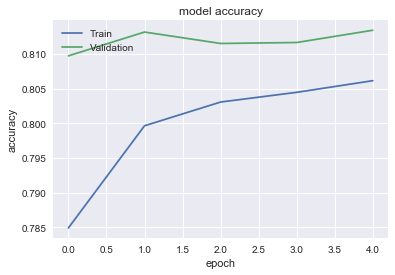

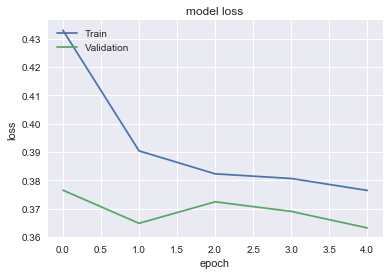

In [102]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [103]:
from sklearn.metrics import classification_report
target_names=["Declined", "Approved"]
print(classification_report(y_test, pred, target_names=target_names))

             precision    recall  f1-score   support

   Declined       0.53      0.76      0.62     13989
   Approved       0.94      0.86      0.90     66866

avg / total       0.87      0.84      0.85     80855



## Comparing Model Accuracy in Analysis 1

Text(0.5,1,'Model Accuracy Comparison')

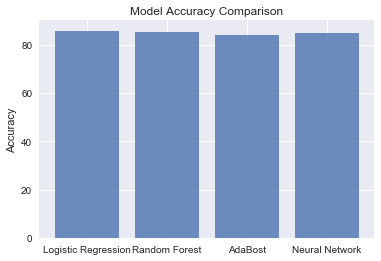

In [104]:
objects = ('Logistic Regression', 'Random Forest', 'AdaBost', 'Neural Network')
y_pos = np.arange(len(objects))
performance = [lr_acc,rf_acc,ab_acc,nn_acc]
 
plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

## Comparing Model Training Time in Analysis 1

Text(0.5,1,'Model Accuracy Comparison')

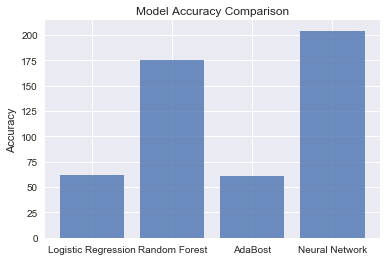

In [105]:
objects = ('Logistic Regression', 'Random Forest', 'AdaBost', 'Neural Network')
y_pos = np.arange(len(objects))
performance = [lr_time,rf_time,ab_time,nn_time]
 
plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

In [184]:
performance

[62.010624170303345, 174.8533010482788, 61.19217371940613, 204.06402921676636]

# Report

##### Total 9 Supervised Classification model were tested on this data and these were the top 4 model which performed well the data.

### Model 1 Logistic Regression
	
Hyper parameters : C =1000, <br>
1) max_iter =100, <br>
2) solver =liblinear, <br>
3) penalty = l2<br>

### Model 2 Random Forest Classifier
	
Hyper parameters : <br>
1) n_estimators =100, <br>
2) criterion = 'entropy'<br>

### Model 3 AdaBoost Classifier
	
Hyper parameters : <br>
1) algorithm='SAMME.R',<br>
2) base_estimator=None,<br>
3) learning_rate=1.0,<br>
4) n_estimators=50<br>

### Model 4 Deep Neural Network:
	
1) Layer 1 : 32 units Dense Layer with activation ‘relu’
2) Layer 2 : 64 units Dense Layer with activation ‘relu’
3) Layer 3 : 1 units Dense Layer with activation ‘sigmoid
4) Loss Function : binary_crossentropy
5) Optimizer : ADAM
6) Epochs: 5
7) Batch Size : 64
8) Validation split : 0.20


##### All these parameters are choose  after tuning and testing, performing hyperparamter tuning, cross-validation, etc  and this parameter are the best parameter for our data.







## Analysis 

Train Data   =  2014, 2015, 2016 (288000 Sample)<br>
Test Data     =  2017 (80855 Sample)<br><br><br>
<br>

## Results:

### Model 1 Logistic Regression:

1) Accuracy: Accuracy :  85.84 %

2) Confusion Matrix : [[10370  3619]
 			[ 7825 59041]]
3) Precision : 0.88

4) Recall : 0.86

5) F1-Score : 0.87



### Model 2 Random Forest:

1) Accuracy: Accuracy :  85.35%

2) Confusion Matrix : [[11335  2654]
 [ 9189 57677]]

3) Precision : 0.89

4) Recall : 0.85

5) F1-Score : 0.86










### Model 3 Adaboost Classifier: 
1) Accuracy: Accuracy :  84.15 %

2) Confusion Matrix : [[10595  3394]
 			[ 9421 57445]]

3) Precision : 0.87

4) Recall : 0.84

5) F1-Score : 0.85




### Model 4 Deep Neural Network:

1) Accuracy: Accuracy :  84.82 %

2) Loss : 0.30

3) Precision : 0.87

4) Recall : 0.84

4) F1-Score : 0.85



	


## Comparing Model Accuracy in Analysis:




| Model | Accuracy | Precision | Recall   | F1- Score   |
|------|------|------|------|------|------|
|   Logistic Regression  | 85.84%|0.88|   0.86 | 0.87|
|   Random Forest Classifier  | 85.35%|0.89|   0.85  | 0.86|
|   AdaBoost Classifier  | 84.15%|0.87| 0.84|   0.85  |
|   Deep Neural Network  | 84.82%|0.87| 0.84|   0.85  |












Comparing Model Training Time:

| Model | Training Time | 
|------|------|
|   Logistic Regression  | 64.01|
|   Random Forest Classifier  |174.85|
|   AdaBoost Classifier  | 61.19|
|   Deep Neural Network  | 204.06|






Model Of Choice :
If we compare accuracy and f1score all the 4 model got a accuracy greater than 84% and f1score greater than 0.85.

But some model have a trade off of time vs accuracy like, Random Forest and Deep Neural Network.

Therefore Model of Choice will be Logistic Regression as it takes 64.01 seconds to train the model and has the highest accur

In [220]:
s = "| This | Accuracy | Precision | Recall   | F1- Score   |
|------|------|------|------|------|------|
|   a  | table|"

SyntaxError: EOL while scanning string literal (<ipython-input-220-7cb72cee6a36>, line 1)

| Model | Accuracy | Precision | Recall   | F1- Score   |
|------|------|------|------|------|------|
|   Logistic Regression  | 85.84%|0.88|   0.86 | 0.87|
|   Random Forest Classifier  | 85.35%|0.89|   0.85  | 0.86|
|   AdaBoost Classifier  | 84.15%|0.87| 0.84|   0.85  |
|   Deep Neural Network  | 84.82%|0.87| 0.84|   0.85  |